In [3]:
!pip install easyocr
!pip install imutils

In [118]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

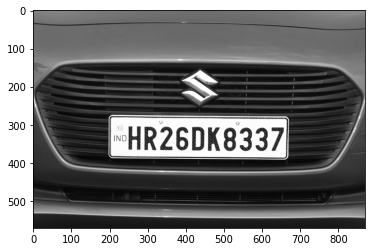

In [211]:
img = cv2.imread('image2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

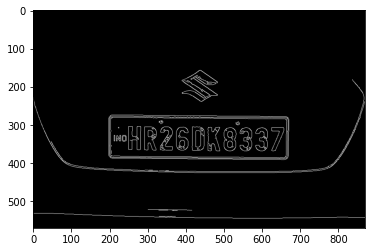

In [239]:
bfilter = cv2.bilateralFilter(gray, 221, 100, 100) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [213]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [214]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [215]:
location

array([[[198, 282]],

       [[663, 278]],

       [[669, 381]],

       [[206, 387]]], dtype=int32)

In [216]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

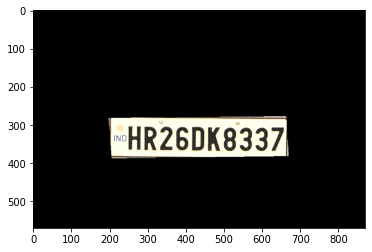

In [217]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [218]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

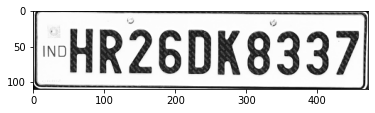

In [219]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [220]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[8, 44], [54, 44], [54, 70], [8, 70]], 'INDI', 0.5039367079734802),
 ([[41, 11], [470, 11], [470, 109], [41, 109]],
  'HRZGDK8337|',
  0.4069528944801015)]

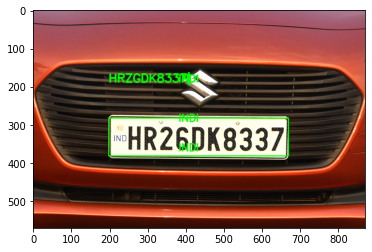

In [228]:
text = result[0][-2]
text1 = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text1, org=(approx[0][0][0], approx[1][0][1]-90), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.putText(img, text=text, org=(approx[2][0][1], approx[1][0][1]-90), fontFace=font, fontScale=.9, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [230]:
def state(char):
    if(char=='cg'or char=='CG'):
        print("chattishgarh")
    elif(char=='ka'or char=='KA'):
        print("karnataka")
    elif(char=='mh'or char=='MH'):
        print("maharastra")
    elif(char=='hr' or char=='HR'):
        print("haryana")
        

In [231]:
#text=result[1][-2]
#text1=result[0][-2]
print(text1)
print(text)
e=state(text1[0:2])
        

HRZGDK8337|
INDI
haryana


In [232]:
f1=open("ANPD_ENTRY.txt","a")
f1.write('hello world\t')
f1.write("detected licence plate number is\t")
f1.write(text)
f1.write('\t')
f1.write(text1)
f1.write("\n")
f1.close()